# Imports

In [4]:
!pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
import matplotlib.cm as cm

# IAA metrics data

In [7]:
overall_df = pd.DataFrame({
    "Bias Name": [
        "Total (Bias vs. No Bias)",
        "Affect heuristic",
        "Availability heuristic",
        "Representativeness heuristic",
        "Confirmation bias",
        "All-or-nothing thinking"
    ],
    "Fleiss_Kappa": [0.0309, 0.0556, 0.0861, 0.0288, 0.0745, 0.0721],
    "Gwet_AC1": [0.9442, 0.8196, 0.9498, 0.9810, 0.9262, 0.9737]
})

# 2. Agreement by Topic (AI vs Climate Change)
by_topic_df = pd.DataFrame({
    "Bias Name": [
        "Total (Bias vs. No Bias)",
        "Affect heuristic",
        "Availability heuristic",
        "Representativeness heuristic",
        "Confirmation bias",
        "All-or-nothing thinking"
    ],
    "Fleiss_Kappa_AI": [0.0177, 0.0357, 0.0089, 0.0220, 0.0181, 0.0610],
    "Fleiss_Kappa_CC": [0.0239, 0.0753, 0.1515, 0.0352, 0.1123, 0.0870],
    "Gwet_AC1_AI": [0.9388, 0.8225, 0.9596, 0.9847, 0.9472, 0.9734],
    "Gwet_AC1_CC": [0.9492, 0.8946, 0.9616, 0.9852, 0.9341, 0.9833]
})

# 3. Agreement by Platform (Reddit vs X)
by_platform_df = pd.DataFrame({
    "Bias Name": [
        "Total (Bias vs. No Bias)",
        "Affect heuristic",
        "Availability heuristic",
        "Representativeness heuristic",
        "Confirmation bias",
        "All-or-nothing thinking"
    ],
    "Fleiss_Kappa_Reddit": [0.0264, 0.0537, 0.0961, 0.0111, 0.0818, 0.0766],
    "Fleiss_Kappa_X": [0.0179, 0.0604, 0.0558, 0.0847, 0.0501, 0.0486],
    "Gwet_AC1_Reddit": [0.9429, 0.8619, 0.9598, 0.9840, 0.9379, 0.9758],
    "Gwet_AC1_X": [0.9474, 0.8575, 0.9628, 0.9876, 0.9473, 0.9859]
})


# Main_Agree_All_HAnn

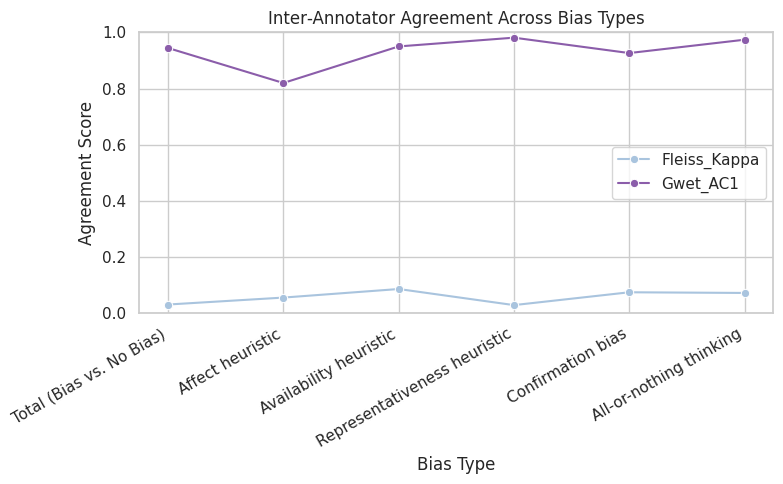

In [70]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("BuPu", 2)

overall_long = overall_df.melt(
    id_vars="Bias Name",
    value_vars=["Fleiss_Kappa","Gwet_AC1"],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(8,5))
sns.lineplot(
    data=overall_long,
    x="Bias Name", y="Score", hue="Metric",
    marker="o", palette=palette
)
plt.ylim(0,1)
plt.xticks(rotation=30, ha="right")
plt.xlabel("Bias Type")
plt.ylabel("Agreement Score")
plt.title("Inter‐Annotator Agreement Across Bias Types")
plt.legend(title="")
plt.tight_layout()
plt.show()


## Fleiss per Topic

In [3]:
bias_order = by_topic_df["Bias Name"].tolist() 

In [5]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Blues", 2)

/tmp/ipykernel_40/4048194128.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


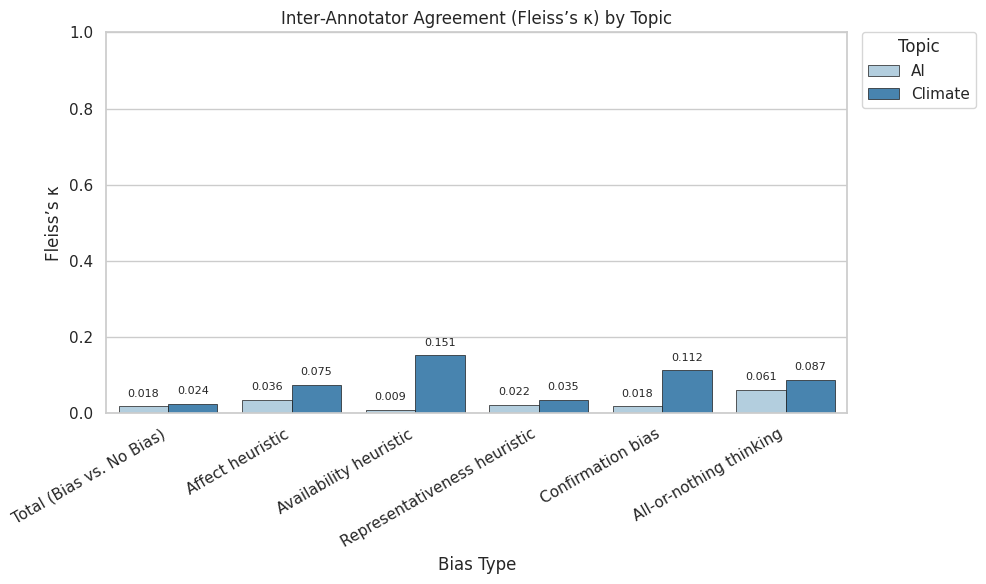

In [125]:
fleiss_df = by_topic_df.melt(
    id_vars="Bias Name",
    value_vars=["Fleiss_Kappa_AI", "Fleiss_Kappa_CC"],
    var_name="Topic", value_name="Score"
)
fleiss_df["Topic"] = fleiss_df["Topic"].str.replace("Fleiss_Kappa_", "")
fleiss_df["Topic"] = fleiss_df["Topic"].replace({"CC": "Climate"})

bias_order = by_topic_df["Bias Name"].tolist()
topics = ["AI", "Climate"]
width = 0.8 / len(topics)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=fleiss_df,
    x="Bias Name", y="Score", hue="Topic",
    order=bias_order, hue_order=topics,
    palette=palette, edgecolor="0.1", linewidth=0.5,
    ax=ax
)

ax.set_ylim(0,1)
ax.set_xlabel("Bias Type")
ax.set_ylabel("Fleiss’s κ")
ax.set_title("Inter‐Annotator Agreement (Fleiss’s κ) by Topic")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.legend(
    title="Topic",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

for j, topic in enumerate(topics):
    subset = fleiss_df[fleiss_df.Topic == topic]
    for _, row in subset.iterrows():
        i = bias_order.index(row["Bias Name"])
        x = i + (j - (len(topics)-1)/2) * width
        y = row["Score"]
        ax.text(
            x, y + 0.02,
            f"{y:.3f}",
            ha="center", va="bottom",
            fontsize=8
        )

plt.tight_layout()
plt.show()

## Gwet's AC1 per topic

In [140]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Purples", 2)

/tmp/ipykernel_40/3414376280.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


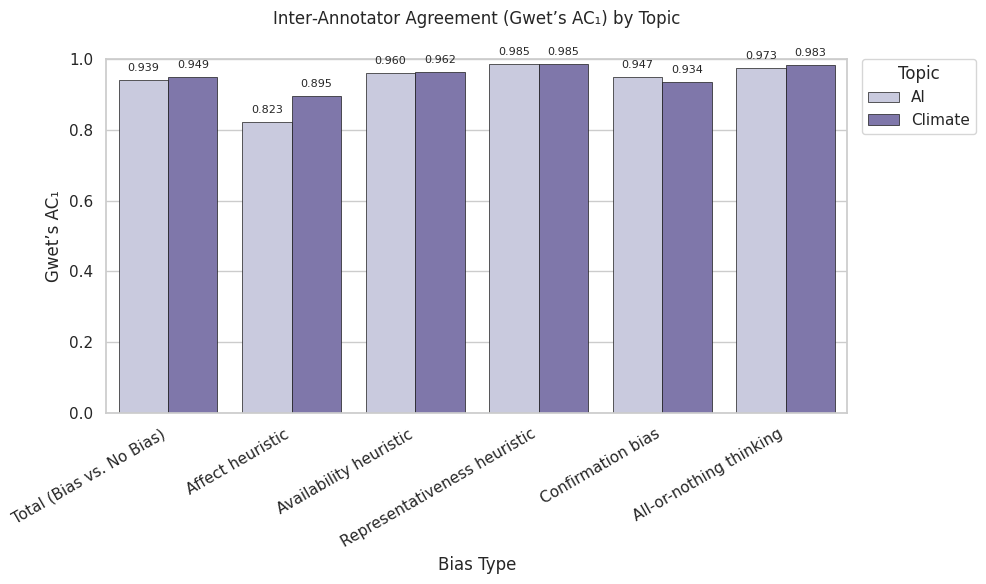

In [143]:
gwet_df = by_topic_df.melt(
    id_vars="Bias Name",
    value_vars=["Gwet_AC1_AI", "Gwet_AC1_CC"],
    var_name="Topic", value_name="Score"
)

gwet_df["Topic"] = gwet_df["Topic"].str.replace("Gwet_AC1_", "")
gwet_df["Topic"] = gwet_df["Topic"].replace({"CC": "Climate"})

bias_order = by_topic_df["Bias Name"].tolist()
topics = ["AI", "Climate"]
width = 0.8 / len(topics)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=gwet_df,
    x="Bias Name", y="Score", hue="Topic",
    order=bias_order, hue_order=topics,
    palette=palette, edgecolor="0.1", linewidth=0.5,
    ax=ax
)

ax.set_ylim(0,1)
ax.set_xlabel("Bias Type")
ax.set_ylabel("Gwet’s AC₁")
ax.set_title("Inter‐Annotator Agreement (Gwet’s AC₁) by Topic", pad=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.legend(
    title="Topic",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

for j, topic in enumerate(topics):
    subset = gwet_df[gwet_df.Topic == topic]
    for _, row in subset.iterrows():
        i = bias_order.index(row["Bias Name"])
        x = i + (j - (len(topics)-1)/2) * width
        y = row["Score"]
        ax.text(
            x, y + 0.02,
            f"{y:.3f}",
            ha="center", va="bottom",
            fontsize=8
        )

plt.tight_layout()
plt.show()

# Spider charts - per Annotator

In [10]:
pairs = ["BS–FS", "BS–IR", "BS–WL", "FS–IR", "FS–WL", "IR–WL"]

cohen_kappa = [0.1339, 0.1073, 0.1522, 0.2215, 0.0969, 0.0848]
f1_score    = [0.8347, 0.8893, 0.9464, 0.7126, 0.6655, 0.7969]
gwet_ac1    = [0.67475, 0.81436, 0.94458, 0.61175, 0.66440, 0.81349]

pairwise_df = pd.DataFrame({
    "Pair": pairs,
    "Cohen_Kappa": cohen_kappa,
    "F1_Score":    f1_score,
    "Gwet_AC1":    gwet_ac1
})

# 3. Display for confirmation
pairwise_df

,Pair,Cohen_Kappa,F1_Score,Gwet_AC1
0,BS–FS,0.1339,0.8347,0.67475
1,BS–IR,0.1073,0.8893,0.81436
2,BS–WL,0.1522,0.9464,0.94458
3,FS–IR,0.2215,0.7126,0.61175
4,FS–WL,0.0969,0.6655,0.66440
5,IR–WL,0.0848,0.7969,0.81349


## Bias presence

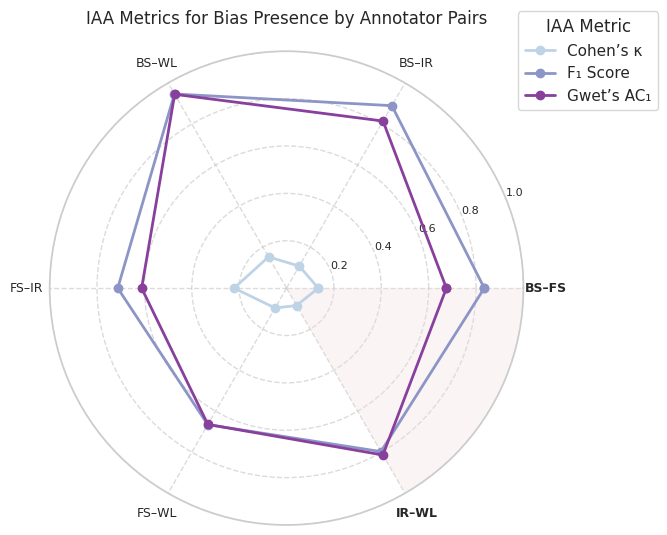

In [206]:
metrics       = ["Cohen_Kappa","F1_Score","Gwet_AC1"]
metric_labels = ["Cohen’s κ","F₁ Score","Gwet’s AC₁"]
pairs         = pairwise_df["Pair"].tolist()
N             = len(pairs)
angles        = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles       += angles[:1]
sector_width  = 2*np.pi / N

values = {m: pairwise_df[m].tolist()+[pairwise_df[m].tolist()[0]] for m in metrics}

# Determine wedge between ir–wl (idx=5) and bs–fs (idx=0), crossing 0
start_idx   = pairs.index("IR–WL")
start_ang   = angles[start_idx] + sector_width/2
wedge_width = sector_width

plt.figure(figsize=(7,7))
ax = plt.subplot(projection='polar')
sns.set_palette("BuPu", len(metrics))

ax.bar(
    x=start_ang,
    height=1.0,
    width=wedge_width,
    bottom=0,
    color="#f4dcdc",
    alpha=0.3,
    edgecolor="none"
)

for m, lbl, color in zip(metrics, metric_labels, sns.color_palette()):
    ax.plot(angles, values[m], marker='o', linewidth=2, label=lbl, color=color)

ax.set_ylim(0,1)
ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
ax.set_yticklabels(["0.2","0.4","0.6","0.8","1.0"], fontsize=8)
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_xticks(angles[:-1])
labels = ax.set_xticklabels(pairs, fontsize=9)
for idx, lbl in enumerate(labels):
    if pairs[idx] in ("BS–FS","IR–WL"):
        lbl.set_fontweight("bold")

ax.legend(loc='upper right', bbox_to_anchor=(1.3,1.1), title="IAA Metric")
plt.title("IAA Metrics for Bias Presence by Annotator Pairs", pad=20)

plt.tight_layout()
plt.show()

## Each bias

In [13]:
pairs = ["BS–FS", "BS–IR", "BS–WL", "FS–IR", "FS–WL", "IR–WL"]
biases = ["affect_h", "availability_h", "representativeness_h", "confirmation_b", "all_or_nothing"]

cohen_data = {
    "affect_h":           [0.0494, 0.0804, 0.1403, 0.1207, 0.0797, 0.0554],
    "availability_h":     [0.1691, 0.0408, 0.0763, 0.0883, 0.0706, 0.0799],
    "representativeness_h":[-0.0035,0.0495,-0.0015,0.0665,-0.0017,-0.0019],
    "confirmation_b":     [0.1477, 0.0494, 0.0990, 0.0801, 0.0774, 0.0012],
    "all_or_nothing":     [0.0847, 0.0618, 0.0896, 0.0335, 0.2630, 0.0570]
}

f1_data = {
    "affect_h":           [0.8855, 0.9627, 0.9834, 0.7474, 0.7372, 0.9171],
    "availability_h":     [0.9769, 0.9756, 0.9916, 0.9313, 0.9429, 0.9498],
    "representativeness_h":[0.9935,0.9857,0.9955,0.9828,0.9920,0.9666],
    "confirmation_b":     [0.9575,0.9657,0.9819,0.8963,0.9070,0.9379],
    "all_or_nothing":     [0.9849,0.9747,0.9852,0.9796,0.9924,0.9610]
}

gwet_data = {
    "affect_h":           [0.76308, 0.93815, 0.98056, 0.73828, 0.76547, 0.93100],
    "availability_h":     [0.96092, 0.95971, 0.99227, 0.92805, 0.95785, 0.96290],
    "representativeness_h":[0.99227,0.97608,0.99632,0.97431,0.99396,0.97646],
    "confirmation_b":     [0.93011,0.95019,0.98301,0.89696,0.92747,0.95106],
    "all_or_nothing":     [0.98647,0.96579,0.98715,0.96868,0.99259,0.97008]
}

dfs = {}
for bias in biases:
    dfs[bias] = pd.DataFrame({
        "Pair":        pairs,
        "Cohen_Kappa": cohen_data[bias],
        "F1_Score":    f1_data[bias],
        "Gwet_AC1":    gwet_data[bias]
    })

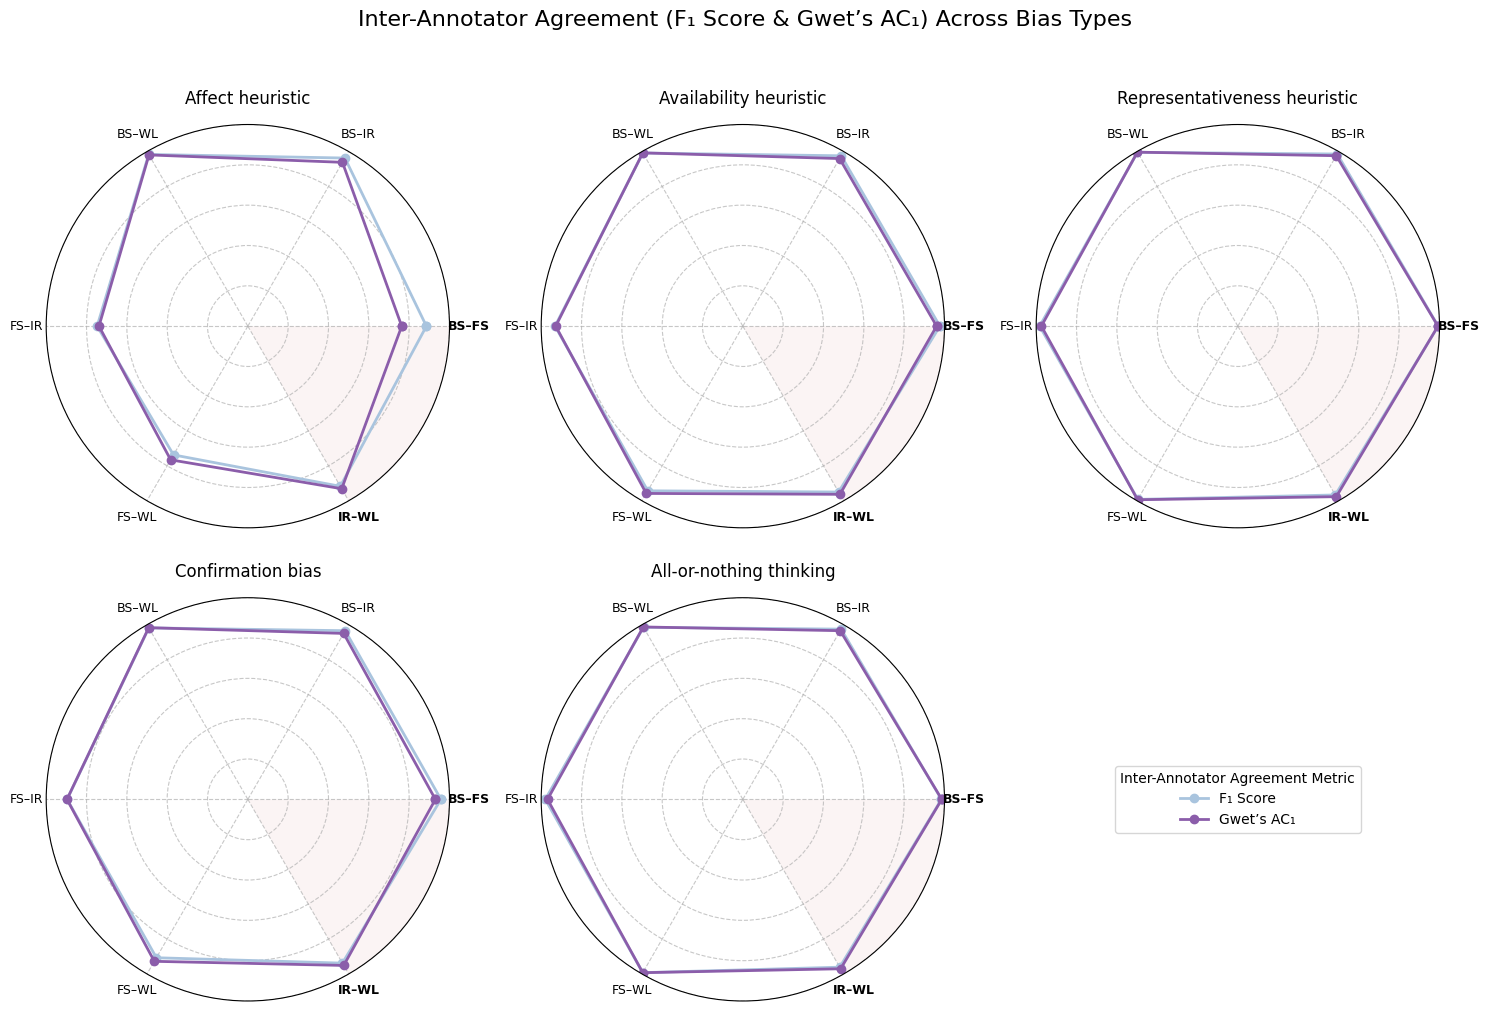

In [11]:
biases      = ["affect_h", "availability_h", "representativeness_h", "confirmation_b", "all_or_nothing"]
bias_titles = {
    "affect_h":             "Affect heuristic",
    "availability_h":       "Availability heuristic",
    "representativeness_h": "Representativeness heuristic",
    "confirmation_b":       "Confirmation bias",
    "all_or_nothing":       "All-or-nothing thinking"
}
pairs = dfs[biases[0]]["Pair"].tolist()
N     = len(pairs)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]
sector_width = 2*np.pi / N

metrics       = ["F1_Score", "Gwet_AC1"]
metric_labels = ["F₁ Score", "Gwet’s AC₁"]

fig, axes = plt.subplots(
    2, 3,
    figsize=(15, 10),
    subplot_kw=dict(polar=True)
)
axes = axes.flatten()

for i, bias in enumerate(biases):
    ax = axes[i]
    df = dfs[bias]
    
    start_idx = pairs.index("IR–WL")
    start_ang = angles[start_idx] + sector_width/2
    ax.bar(
        x=start_ang, height=1, width=sector_width, bottom=0,
        color="#f4dcdc", alpha=0.3, edgecolor="none"
    )
    
    sns.set_palette("BuPu", len(metrics))
    for m, lbl, color in zip(metrics, metric_labels, sns.color_palette()):
        vals = df[m].tolist() + [df[m].tolist()[0]]
        ax.plot(angles, vals, marker="o", linewidth=2, label=lbl, color=color)
    
    ax.set_ylim(0,1)
    ax.set_yticks([0.2,0.4,0.6,0.8,1.0])
    ax.set_yticklabels([])
    ax.grid(True, linestyle="--", alpha=0.7)
    
    ax.set_xticks(angles[:-1])
    labels = ax.set_xticklabels(pairs, fontsize=9)
    for idx_lbl, lbl in enumerate(labels):
        if pairs[idx_lbl] in ("BS–FS","IR–WL"):
            lbl.set_fontweight("bold")

    ax.set_title(bias_titles[bias], pad=15)

ax_leg = axes[5]
handles, labels = axes[0].get_legend_handles_labels()
ax_leg.legend(handles, labels, title="Inter-Annotator Agreement Metric", loc="center")
ax_leg.axis("off")

fig.suptitle(
    "Inter-Annotator Agreement (F₁ Score & Gwet’s AC₁) Across Bias Types",
    fontsize=16,
    y=1.02
)

plt.tight_layout()
plt.show()

# Statistical tests

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, ttest_rel, wilcoxon
import scipy.stats as stats

In [16]:
categories = [
    ("bias_no_bias",       pairwise_df),
    ("affect_h",           dfs["affect_h"]),
    ("availability_h",     dfs["availability_h"]),
    ("representativeness_h", dfs["representativeness_h"]),
    ("confirmation_b",     dfs["confirmation_b"]),
    ("all_or_nothing",     dfs["all_or_nothing"])
]

expert_pairs    = ["BS–FS", "IR–WL"]
nonexpert_pairs = ["BS–IR", "BS–WL", "FS–IR", "FS–WL"]
metrics         = ["Cohen_Kappa", "F1_Score", "Gwet_AC1"]

print(f"{'Category':25s} {'Metric':15s} {'Test':>18s} {'Stat':>9s} {'p':>9s} {'Eff':>9s}")
print("-"*90)

for bias, df in categories:
    for metric in metrics:
        ex = df.loc[df["Pair"].isin(expert_pairs), metric].values
        nx = df.loc[df["Pair"].isin(nonexpert_pairs), metric].values

        # Decide test
        if len(ex) >= 3 and len(nx) >= 3:
            # normality check
            p_ex = stats.shapiro(ex).pvalue
            p_nx = stats.shapiro(nx).pvalue
            if p_ex > 0.05 and p_nx > 0.05:
                test_name = "Welch t-test"
                stat, pval = stats.ttest_ind(ex, nx, equal_var=False)
                # Cohen's d
                sd_pooled = np.sqrt((ex.var(ddof=1) + nx.var(ddof=1)) / 2)
                eff = (ex.mean() - nx.mean()) / sd_pooled
            else:
                test_name = "Mann-Whitney U"
                stat, pval = stats.mannwhitneyu(ex, nx, alternative="two-sided")
                n1, n2 = len(ex), len(nx)
                eff = 1 - (2 * stat) / (n1 * n2)
        else:
            # too few for normality → nonparametric
            test_name = "Mann-Whitney U"
            stat, pval = stats.mannwhitneyu(ex, nx, alternative="two-sided")
            n1, n2 = len(ex), len(nx)
            eff = 1 - (2 * stat) / (n1 * n2)

        print(
            f"{bias:25s}"
            f" {metric:15s}"
            f" {test_name:18s}"
            f" {stat:9.4f}"
            f" {pval:9.4f}"
            f" {eff:9.4f}"
        )


Category                  Metric                        Test      Stat         p       Eff
------------------------------------------------------------------------------------------
bias_no_bias              Cohen_Kappa     Mann-Whitney U        2.0000    0.5333    0.5000
bias_no_bias              F1_Score        Mann-Whitney U        4.0000    1.0000    0.0000
bias_no_bias              Gwet_AC1        Mann-Whitney U        4.0000    1.0000    0.0000
affect_h                  Cohen_Kappa     Mann-Whitney U        0.0000    0.1333    1.0000
affect_h                  F1_Score        Mann-Whitney U        4.0000    1.0000    0.0000
affect_h                  Gwet_AC1        Mann-Whitney U        3.0000    0.8000    0.2500
availability_h            Cohen_Kappa     Mann-Whitney U        7.0000    0.2667   -0.7500
availability_h            F1_Score        Mann-Whitney U        5.0000    0.8000   -0.2500
availability_h            Gwet_AC1        Mann-Whitney U        6.0000    0.5333   -0.5000

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57b17465-b515-43be-9dff-cc539004fde2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>